# Stock prices

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import requests

In [ ]:
def fix_datetime_on_dataframe(df):
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(keys='date', inplace=True)

In [ ]:
def create_stock_df_of_company(company_code):
    url = f'https://iex.lewagon.com/stable/stock/{company_code}/chart/3m'
    df = pd.read_json(url)
    fix_datetime_on_dataframe(df)
    df['company_code'] = company_code
    return df

In [ ]:
apple_df = create_stock_df_of_company('aapl')
apple_df.head()

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent,company_code
date,,,,,,,,,,,,,,,,,,,,,
2022-10-17,142.41,142.900,140.270,141.065,2022-10-17,AAPL,85250939,HISTORICAL_PRICES,AAPL,,...,85250939,140.654,141.995,142.484,139.861,85250939,"Oct 17, 22",0.00,0.0000,aapl
2022-10-18,143.75,146.700,140.610,145.490,2022-10-18,AAPL,99136610,HISTORICAL_PRICES,AAPL,,...,99136610,145.066,143.331,146.272,140.200,99136610,"Oct 18, 22",1.34,0.0094,aapl
2022-10-19,143.86,144.949,141.500,141.690,2022-10-19,AAPL,61758340,HISTORICAL_PRICES,AAPL,,...,61758340,141.277,143.441,144.527,141.088,61758340,"Oct 19, 22",0.11,0.0008,aapl
2022-10-20,143.39,145.890,142.650,143.020,2022-10-20,AAPL,64521989,HISTORICAL_PRICES,AAPL,,...,64521989,142.603,142.972,145.465,142.234,64521989,"Oct 20, 22",-0.47,-0.0033,aapl
2022-10-21,147.27,147.848,142.649,142.870,2022-10-21,AAPL,86548609,HISTORICAL_PRICES,AAPL,,...,86548609,142.454,146.841,147.417,142.233,86548609,"Oct 21, 22",3.88,0.0271,aapl


<AxesSubplot:xlabel='date'>

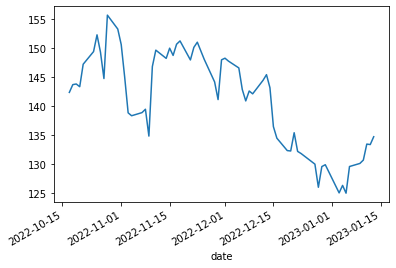

In [ ]:
apple_df['close'].plot(kind='line')

<AxesSubplot:xlabel='date'>

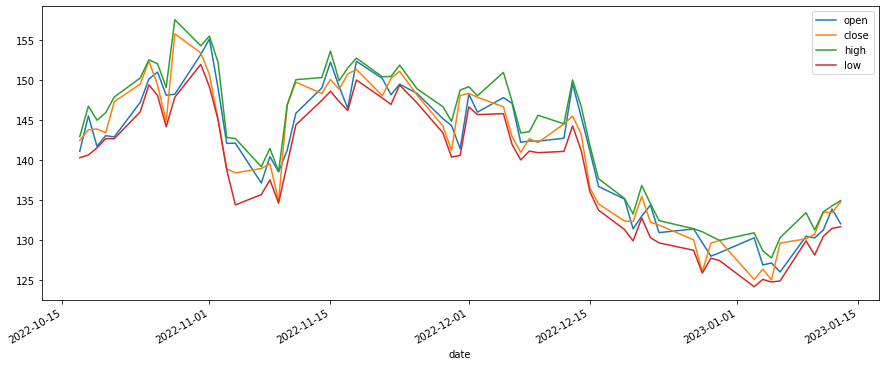

In [ ]:
apple_df[['open', 'close', 'high', 'low']].plot(kind='line', figsize=(15,6))

In [ ]:
apple_df.columns

Index(['close', 'high', 'low', 'open', 'priceDate', 'symbol', 'volume', 'id',
       'key', 'subkey', 'updated', 'changeOverTime', 'marketChangeOverTime',
       'uOpen', 'uClose', 'uHigh', 'uLow', 'uVolume', 'fOpen', 'fClose',
       'fHigh', 'fLow', 'fVolume', 'label', 'change', 'changePercent',
       'company_code'],
      dtype='object')

In [ ]:
# Set default figsize for all notebook (usefull in TS analysis)
matplotlib.rcParams['figure.figsize'] = (15, 6)

- Amazon stock prices: https://cloud.iexapis.com/stable/stock/amzn/chart/ytd?token=pk_bb6b159d9ccd4ac2bedb4a98aaef5bad
- Meta (Facebook) market cap: https://cloud.iexapis.com/stable/stock/meta/stats/marketcap?token=pk_bb6b159d9ccd4ac2bedb4a98aaef5bad
- Apple research and development spendings quarterly: https://cloud.iexapis.com/stable/stock/aapl/financials?token=pk_bb6b159d9ccd4ac2bedb4a98aaef5bad
- The last news about Tesla: https://cloud.iexapis.com/stable/stock/tsla/news/last/1?token=pk_bb6b159d9ccd4ac2bedb4a98aaef5bad
- The performance of the ‘Energy’ sector: https://cloud.iexapis.com/stable/stock/market/sector-performance?token=pk_bb6b159d9ccd4ac2bedb4a98aaef5bad

In [ ]:
codes = ['amzn', 'googl', 'meta']
stock_dfs = [apple_df]
for code in codes:
    stock_dfs.append(create_stock_df_of_company(code))

In [ ]:
stocks_df = pd.concat(stock_dfs)
stocks_df.head()
# stocks_df_ = stocks_df.loc[:,['uClose','company_code']]
# stocks_df_

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent,company_code
date,,,,,,,,,,,,,,,,,,,,,
2022-10-17,142.41,142.900,140.270,141.065,2022-10-17,AAPL,85250939,HISTORICAL_PRICES,AAPL,,...,85250939,140.654,141.995,142.484,139.861,85250939,"Oct 17, 22",0.00,0.0000,aapl
2022-10-18,143.75,146.700,140.610,145.490,2022-10-18,AAPL,99136610,HISTORICAL_PRICES,AAPL,,...,99136610,145.066,143.331,146.272,140.200,99136610,"Oct 18, 22",1.34,0.0094,aapl
2022-10-19,143.86,144.949,141.500,141.690,2022-10-19,AAPL,61758340,HISTORICAL_PRICES,AAPL,,...,61758340,141.277,143.441,144.527,141.088,61758340,"Oct 19, 22",0.11,0.0008,aapl
2022-10-20,143.39,145.890,142.650,143.020,2022-10-20,AAPL,64521989,HISTORICAL_PRICES,AAPL,,...,64521989,142.603,142.972,145.465,142.234,64521989,"Oct 20, 22",-0.47,-0.0033,aapl
2022-10-21,147.27,147.848,142.649,142.870,2022-10-21,AAPL,86548609,HISTORICAL_PRICES,AAPL,,...,86548609,142.454,146.841,147.417,142.233,86548609,"Oct 21, 22",3.88,0.0271,aapl


<AxesSubplot:xlabel='date'>

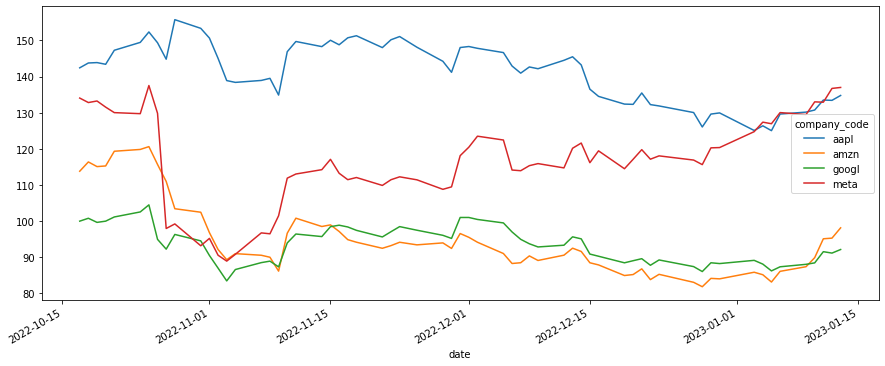

In [ ]:
# Pivot the table to get company_code as columns
pivot_df = stocks_df.pivot(columns='company_code', values='close')
pivot_df.plot(kind='line')

In [ ]:
def normalize(series):
    return series/series[0]

normalized_pivot = pivot_df.apply(normalize, axis=0)

<AxesSubplot:xlabel='date'>

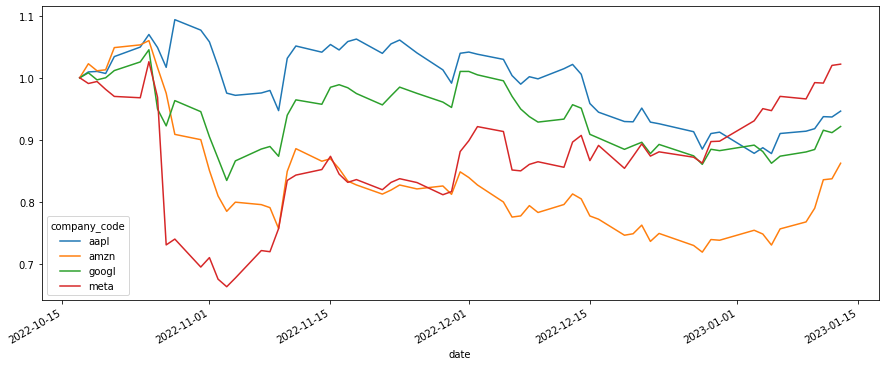

In [ ]:
normalized_pivot.plot(kind='line')